Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)
      Month               Package  Low Price  High Price   Price
70        9  1 1/9 bushel cartons      15.00        15.0  15.000
71        9  1 1/9 bushel cartons      18.00        18.0  18.000
72       10  1 1/9 bushel cartons      18.00        18.0  18.000
73       10  1 1/9 bushel cartons      17.00        17.0  17.000
74       10  1 1/9 bushel cartons      15.00        15.0  15.000
...     ...                   ...        ...         ...     ...
1738      9    1/2 bushel cartons      15.00        15.0  15.000
1739      9    1/2 bushel cartons      13.75        15.0  14.375
1740      9    1/2 bushel cartons      10.75        15.0  12.875
1741      9    1/2 bushel cartons      12.00        12.0  12.000
1742      9    1/2 bushel cartons      12.00        12.0  12.000

[415 rows x 5 columns]


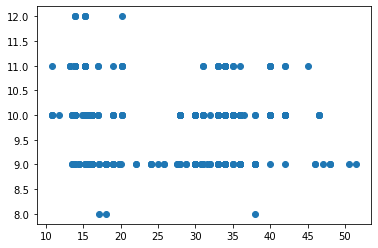

Text(0, 0.5, 'pumpkins price')

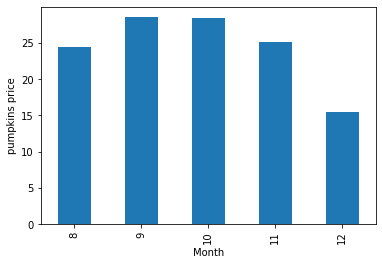

In [13]:
import pandas as pd
import matplotlib.pyplot as plt 

pumpkins = pd.read_csv("../data/US-pumpkins.csv")

# 查看前5行
pumpkins.head()

# 查看是否缺少数据
pumpkins.isnull().sum()

#删除掉一些列
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

# 我们通过仅选择Package列中带有字符串“蒲式耳”的南瓜来过滤它们
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

#计算平均值

price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
month = pd.DatetimeIndex(pumpkins['Date']).month

print(month)

# 现在，将转换后的数据复制到新的Pandas dataframe中：
new_pumpkins = pd.DataFrame({'Month': month, 'Package': pumpkins['Package'], 'Low Price': pumpkins['Low Price'],'High Price': pumpkins['High Price'], 'Price': price})

print(new_pumpkins)

# 对定价进行标准化，以便显示每蒲式耳的定价
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

price = new_pumpkins.Price
month = new_pumpkins.Month

# 按照月份显示价格
plt.scatter(price, month)
plt.show()

new_pumpkins.groupby('Month')['Price'].mean().plot(kind = 'bar')
plt.ylabel('pumpkins price')

Int64Index([ 4,  5,  9,  9, 11, 11,  9,  9, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=1757)
      Month        Package  Low Price  High Price   Price
0         4   24 inch bins     270.00      280.00  275.00
1         5   24 inch bins     270.00      280.00  275.00
2         9   24 inch bins     160.00      160.00  160.00
3         9   24 inch bins     160.00      160.00  160.00
4        11   24 inch bins      90.00      100.00   95.00
...     ...            ...        ...         ...     ...
1752      9  22 lb cartons      14.75       14.75   14.75
1753      9   36 inch bins     275.00      275.00  275.00
1754      9   36 inch bins     275.00      275.00  275.00
1755      9   36 inch bins     275.00      275.00  275.00
1756      9   36 inch bins     275.00      275.00  275.00

[1757 rows x 5 columns]
